In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [81]:
def initializeparams(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    
    params = {"W1": W1, "W2": W2, "b1": b1, "b2": b2}
    return params

In [82]:
def forwardPropogation(X, Y, params):
    m = X.shape[1]
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    Z1 = np.dot(W1, X) + b1 
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), (1-Y))
    cost = -np.sum(logprobs)/m
    return cost, cache, A2

In [83]:
def backwardPropogation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1*(1-A1))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    grads = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return grads

In [84]:
def updateparams(params, grads, lr):
    params["W1"] = params["W1"] - lr*grads["dW1"]
    params["W2"] = params["W2"] - lr*grads["dW2"]
    params["b1"] = params["b1"] - lr*grads["db1"]
    params["b2"] = params["b2"] - lr*grads["db2"]
    return params

0.5564580913699566
0.5562082967464325
0.5559626709703439
0.5557211260611652
0.5554835760134849
0.555249936749711
0.5550201260739758
0.5547940636272098
0.5545716708433535
0.5543528709066762
0.5541375887101752
0.5539257508150227
0.5537172854110377
0.5535121222781512
0.553310192748842
0.5531114296715152
0.5529157673748002
0.5527231416327429
0.5525334896308701
0.5523467499330991
0.5521628624494768
0.5519817684047206
0.5518034103075437
0.551627731920741
0.5514546782320204
0.5512841954255552
0.5511162308542397
0.5509507330126346
0.550787651510575
0.550626937047434
0.5504685413870153
0.550312417333066
0.5501585187053883
0.5500068003165388
0.5498572179490944
0.5497097283334773
0.549564289126319
0.5494208588893514
0.549279397068811
0.5491398639753444
0.5490022207644001
0.5488664294170948
0.5487324527215429
0.548600254254636
0.5484697983642615
0.5483410501519488
0.5482139754559339
0.5480885408346274
0.547964713550481
0.5478424615542375
0.5477217534695591
0.5476025585780195
0.5474848468044552
0.5

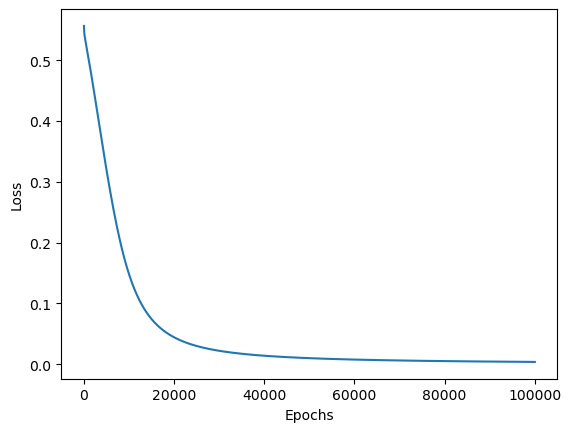

In [90]:
X = np.array([[0,0,1,1], [0,1,0,1]])
Y = np.array([[0,0,0,1]])

neuronsInHiddenLayers = 3
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0]
params = initializeparams(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
lr = 0.01
# W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures).shape
# W1
# losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropogation(X, Y, params)
    print(losses[i,0])
    grads = backwardPropogation(X, Y, cache)
    params = updateparams(params, grads, lr)
    
plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [92]:
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
cost, _, A2 = forwardPropogation(X, Y, params)
prediction = (A2>0.5)*1

print(prediction)

[[0 1 0 0]]
